In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from warnings import filterwarnings
from sklearn import preprocessing


In [58]:
df=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/airline-passenger-traffic.csv")

In [59]:
df.head()

,1949-01,112
0,1949-02,118.0
1,1949-03,132.0
2,1949-04,129.0
3,1949-05,121.0
4,1949-06,135.0


In [60]:
df.rename(columns = {'1949-01':'Year', '112':'Passengers'}, inplace = True)

In [61]:
df.head()

,Year,Passengers
0,1949-02,118.0
1,1949-03,132.0
2,1949-04,129.0
3,1949-05,121.0
4,1949-06,135.0


In [62]:
df.shape

(143, 2)

In [63]:
df.isnull().sum()

Year          0
Passengers    4
dtype: int64

In [64]:
duplicate=df.duplicated()
print(duplicate.sum())
df[duplicate]

0


,Year,Passengers


In [65]:
##Fetaure Engineering Process
df['year']=df['Year'].str.split('-').str[0]
df['Month']=df['Year'].str.split('-').str[1]

In [66]:
df.head()

,Year,Passengers,year,Month
0,1949-02,118.0,1949,02
1,1949-03,132.0,1949,03
2,1949-04,129.0,1949,04
3,1949-05,121.0,1949,05
4,1949-06,135.0,1949,06


In [67]:
df.set_index('Year', inplace=True)
df.head()

,Passengers,year,Month
Year,,,
1949-02,118.0,1949,02
1949-03,132.0,1949,03
1949-04,129.0,1949,04
1949-05,121.0,1949,05
1949-06,135.0,1949,06


In [68]:
df.index

Index(['1949-02', '1949-03', '1949-04', '1949-05', '1949-06', '1949-07',
       '1949-08', '1949-09', '1949-10', '1949-11',
       ...
       '1960-03', '1960-04', '1960-05', '1960-06', '1960-07', '1960-08',
       '1960-09', '1960-10', '1960-11', '1960-12'],
      dtype='object', name='Year', length=143)

In [69]:
df.index = pd.to_datetime(df.index)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 143 entries, 1949-02-01 to 1960-12-01
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Passengers  139 non-null    float64
 1   year        143 non-null    object 
 2   Month       143 non-null    object 
dtypes: float64(1), object(2)
memory usage: 4.5+ KB


In [72]:
y=df['Passengers'].resample('M').mean()



In [73]:
y

Year
1949-02-28    118.0
1949-03-31    132.0
1949-04-30    129.0
1949-05-31    121.0
1949-06-30    135.0
              ...  
1960-08-31    606.0
1960-09-30    508.0
1960-10-31    461.0
1960-11-30    390.0
1960-12-31    432.0
Freq: M, Name: Passengers, Length: 143, dtype: float64

In [74]:
y.isnull().sum()

4

In [75]:
y=y.replace(to_replace=0, value=np.nan)
y=y.astype(float)
median=y.median()
y.replace(np.nan,median,inplace=True)

In [76]:
y.isnull().sum()

0

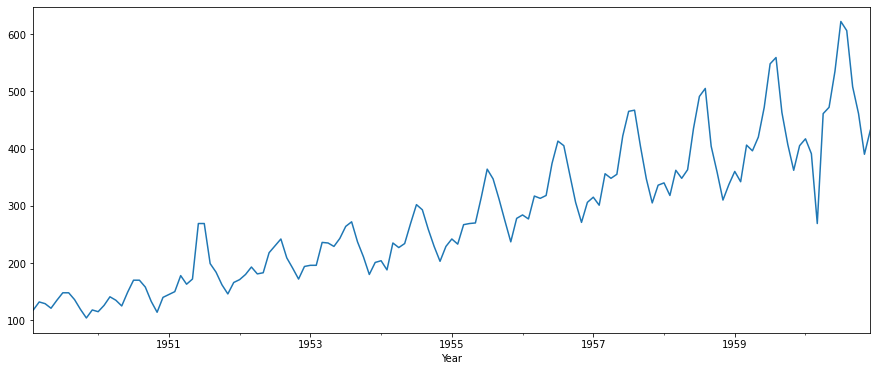

In [77]:
y.plot(figsize=(15,6))
plt.show()

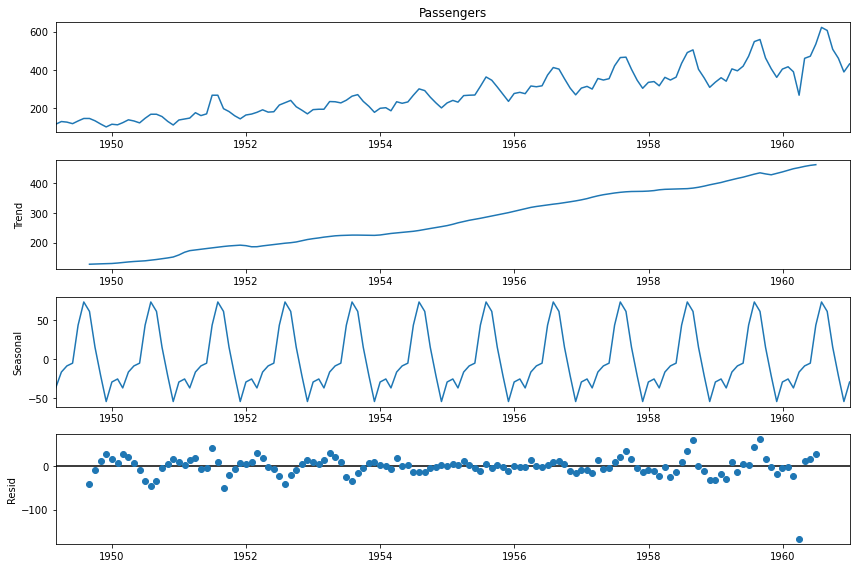

In [78]:
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
from pylab import rcParams

rcParams['figure.figsize']=12,8

decomposition=sm.tsa.seasonal_decompose(y,model='additive')

fig=decomposition.plot()

plt.show()

In [79]:
from pandas import Series
from statsmodels.tsa.stattools import adfuller
results = adfuller(y)
print('ADF Statistic: %f' % results[0])
print('p-Value:%f' % results[1])
print('critical values:')
for key, value in results[4].items():
    print("\t%s: %.3f"%(key,value))

ADF Statistic: 0.852842
p-Value:0.992443
critical values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


In [80]:
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import itertools

In [81]:
p=d=q=range(0,2)
pdq=list(itertools.product(p,d,q))
seasonal_pdq=[(x[0],x[1],x[2],12) for x in list(itertools.product(p,d,q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1],seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1],seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2],seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2],seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [82]:
from pylab import rcParams
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod=sm.tsa.statespace.SARIMAX(y,order=param,
seasonal_order=param_seasonal,
enforce_stationarity=False,
enforce_invertibility=False)
            results=mod.fit()
            print('ARIMA{}x{}12 -AIC:{}'.format(param,param_seasonal,results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 -AIC:2030.7099900442265
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 -AIC:1733.8946637007664
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 -AIC:1335.2052710994571
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 -AIC:1203.262538520296
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 -AIC:1238.969255600357
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 -AIC:1221.4061355480626
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 -AIC:1193.9407821951952
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 -AIC:1142.052413656485
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 -AIC:1845.966554867939
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 -AIC:1581.6382248150148
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 -AIC:1271.6010594218465
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 -AIC:1155.4723827922335
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 -AIC:1224.37629876241
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 -AIC:1213.1273442332497
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 -AIC:1165.6572073424022
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 -AIC:1121.464217369825
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 -AIC:1442.2007750716657
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 -AIC:1282.7110594911023
ARIMA(0, 1, 0)x(0

### Fitting the ARIMA Model

In [83]:
mod=sm.tsa.statespace.SARIMAX(y,
                             order=(0,1,1),
                             seasonal_order=(1,1,1,12),
                             enforce_invertibility=False)
results=mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7464      0.044    -17.027      0.000      -0.832      -0.660
ar.S.L12      -0.2798      0.399     -0.702      0.483      -1.061       0.501
ma.S.L12      -0.0701      0.438     -0.160      0.873      -0.928       0.788
sigma2       610.3520     32.597     18.724      0.000     546.464     674.240


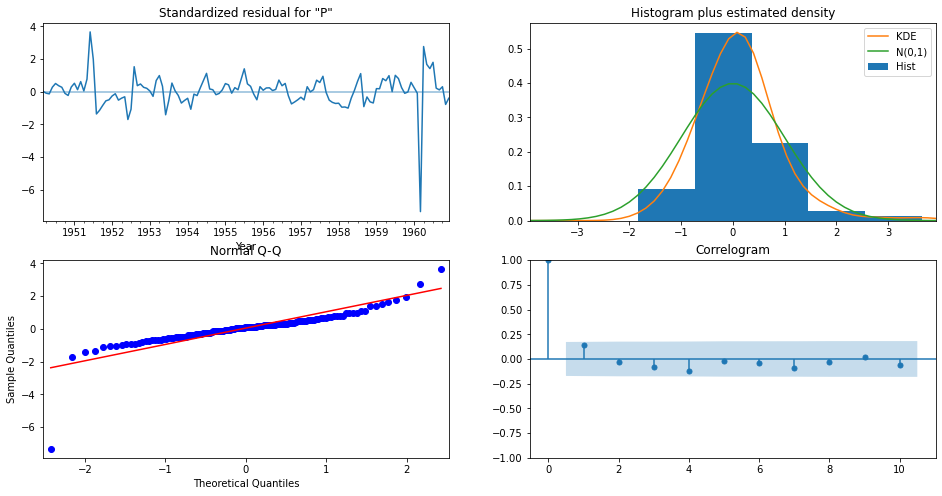

In [84]:
results.plot_diagnostics(figsize=(16,8))
plt.show()

In [85]:
### visualizing the forecast

            lower Passengers  upper Passengers
1961-01-31        406.287398        503.130403
1961-02-28        381.470023        481.379222
1961-03-31        322.592313        425.476367
1961-04-30        442.377396        548.152672
1961-05-31        456.284209        564.873755
1961-06-30        514.544367        625.877067
1961-07-31        595.843194        709.853065
1961-08-31        588.034612        704.660214
1961-09-30        489.399661        608.583601
1961-10-31        438.248525        559.937029
1961-11-30        375.033910        499.176459
1961-12-31        415.795367        542.344381
1962-01-31        421.337455        575.201404


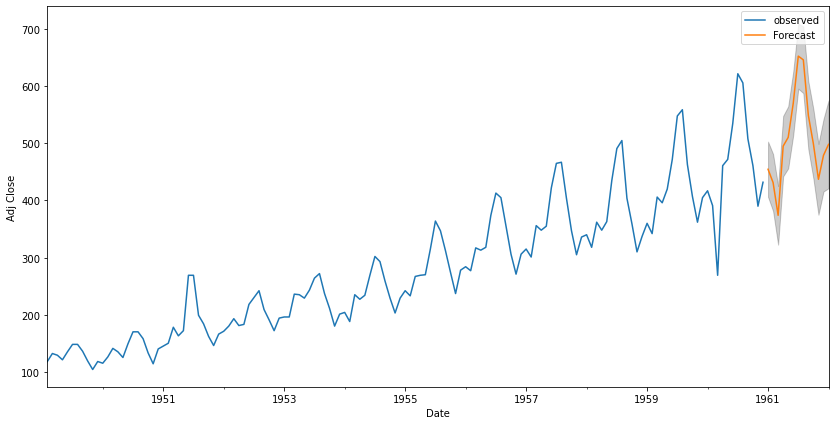

In [86]:
pred_uc=results.get_forecast(steps=13)
pred_ci=pred_uc.conf_int()
ax=y.plot(label="observed",figsize=(14,7))
pred_uc.predicted_mean.plot(ax=ax,label="Forecast")
ax.fill_between(pred_ci.index,
               pred_ci.iloc[:,0],
               pred_ci.iloc[:,1],color="k",alpha=.2)
ax.set_xlabel("Date")
ax.set_ylabel("Adj Close")
print(pred_ci)
plt.legend()
plt.show()

            lower Passengers  upper Passengers
1961-01-31        406.287398        503.130403
1961-02-28        381.470023        481.379222
1961-03-31        322.592313        425.476367
1961-04-30        442.377396        548.152672
1961-05-31        456.284209        564.873755
...                      ...               ...
1968-12-31        283.954261       1264.029242
1969-01-31        291.903344       1296.013875
1969-02-28        261.221969       1278.939338
1969-03-31        182.993842       1214.138510
1969-04-30        313.067922       1357.467277

[100 rows x 2 columns]


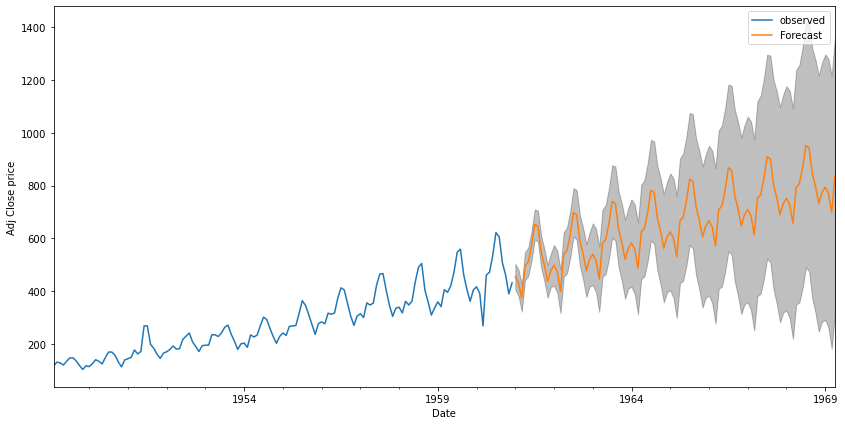

In [87]:
pred_uc=results.get_forecast(steps=100)
pred_ci=pred_uc.conf_int()
ax=y.plot(label="observed",figsize=(14,7))
pred_uc.predicted_mean.plot(ax=ax,label="Forecast")
ax.fill_between(pred_ci.index,
               pred_ci.iloc[:,0],
               pred_ci.iloc[:,1],color="k",alpha=.25)
ax.set_xlabel("Date")
ax.set_ylabel("Adj Close price")
print(pred_ci)
plt.legend()
plt.show()